It is (as far as I know) not possible to resize, blur, or do any other arithmetic on images in OpenCV.
This repoitiry provides the missing code needed: transformations from sRGB to linear and back.

For an explanation and a lot more information about the problem, see
  * [What every coder should know about gamma](http://blog.johnnovak.net/2016/09/21/what-every-coder-should-know-about-gamma/)
  * [Gamma error in picture scaling](http://web.archive.org/web/20160301042052/http://www.4p8.com/eric.brasseur/gamma.html)

In [1]:
import os
import tempfile

import cv2
import IPython.display
import numpy as np

We can not use Matplotlib to display images, since it also perfoms incorrect resizing of images when plotting.
Instead, dump the image as PNG and embed it directly.

In [2]:
def show_cv_image(img):
    # Can not use Matplotlib because it scales images again.
    (handle, tmpname) = tempfile.mkstemp(suffix='.png')
    os.close(handle)
    cv2.imwrite(tmpname, img)
    IPython.display.display(IPython.display.Image(tmpname))
    os.unlink(tmpname)

Demonstration of Problem
============

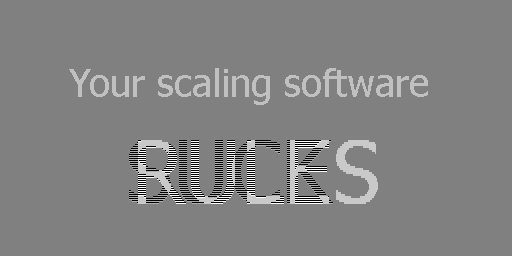

In [3]:
img = cv2.imread('gamma test image.png')
show_cv_image(img)

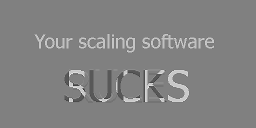

In [4]:
res = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
show_cv_image(res)

Original image


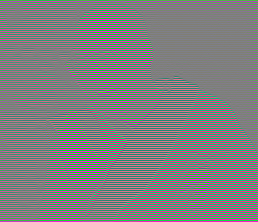

Resized image


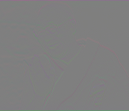

In [5]:
img2 = cv2.imread('gamma_dalai_lama_gray.jpg')
print('Original image')
show_cv_image(img2)
print('Resized image')
res2 = cv2.resize(img2, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
show_cv_image(res2)

Solution
====

Formulas in the `srgb` module are from https://en.wikipedia.org/wiki/SRGB .

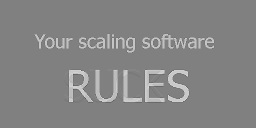

In [6]:
from srgb import to_linear, from_linear

fimg = to_linear(img)
fres = cv2.resize(fimg, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
fres = from_linear(fres)
show_cv_image(fres)

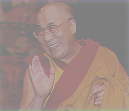

In [7]:
fimg2 = to_linear(img2)
fres2 = cv2.resize(fimg2, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
fres2 = from_linear(fres2)
show_cv_image(fres2)